In [41]:
from tensorflow.keras.layers import Input , Dense , Conv2D , MaxPooling2D , UpSampling2D
from tensorflow.keras.models import Sequential
from matplotlib.pyplot import imshow
import numpy as np
!pip install opencv-python

import cv2
from keras.preprocessing.image import ImageDataGenerator

SIZE = 128



In [42]:
model = Sequential()
model.add(Conv2D(64,(3,3), activation = 'relu' , padding = 'same' , input_shape = (SIZE,SIZE,3) ))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(32,(3,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(16,(3,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(16,(3,3),activation = 'relu',padding = 'same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',padding = 'same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',padding = 'same'))


model.add(UpSampling2D((2,2)))
model.add(Conv2D(3,(3,3),activation = 'sigmoid',padding = 'same'))


model.compile(optimizer = 'adam' , loss = 'mean_squared_error', metrics = ['mse'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 32, 32, 16)        4624      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 16, 16, 16)      

In [43]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

#Decoder
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 32, 32, 16)        4624      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 16, 16, 16)      

In [44]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random

In [11]:
SIZE =128 # size of input data
batch_size = 64 # size of our neural training batches
datagen = ImageDataGenerator(rescale=1./255)


In [28]:
train_generator = datagen.flow_from_directory('cell_images/train_uninfected/',
                                              target_size = (SIZE,SIZE),
                                              batch_size = batch_size,
                                              class_mode = 'input'
                                              
                                              
                                              
                                              
                                              )

Found 2916 images belonging to 1 classes.


In [27]:
anomaly_generator = datagen.flow_from_directory('cell_images/Parasitized',
                                              target_size = (SIZE,SIZE),
                                              batch_size = batch_size,
                                              class_mode = 'input'
                                              
                                              
                                              
                                              
                                              )

Found 3886 images belonging to 2 classes.


In [29]:
validation_generator = datagen.flow_from_directory('cell_images/test_uninfected',
                                              target_size = (SIZE,SIZE),
                                              batch_size = batch_size,
                                              class_mode = 'input'
                                              
                                              
                                              
                                              
                                              )

Found 1349 images belonging to 1 classes.


In [77]:
history = model.fit(
        train_generator,
        steps_per_epoch= 500 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=75 // batch_size,
        shuffle = True) 


Epoch 1/50
7/7 [==============================] - 19s 3s/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 2/50
7/7 [==============================] - 19s 3s/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 3/50
7/7 [==============================] - 17s 2s/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 4/50
7/7 [==============================] - 18s 3s/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 5/50
7/7 [==============================] - 19s 3s/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 6/50
7/7 [==============================] - 19s 3s/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 7/50
7/7 [==============================] - 18s 3s/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 8/50
7/7 [==============================] - 32s 5s/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0

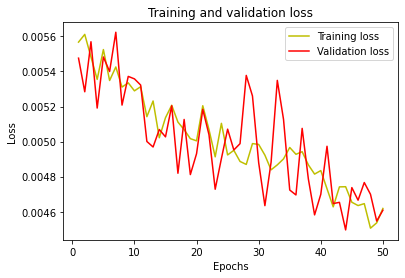

In [79]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [80]:
data_batch = []  #Capture all training batches as a numpy array
img_num = 0
while img_num <= train_generator.batch_index:   #gets each generated batch of size batch_size
    data = train_generator.next()
    data_batch.append(data[0])
    img_num = img_num + 1

predicted = model.predict(data_batch[0])  #Predict on the first batch of images





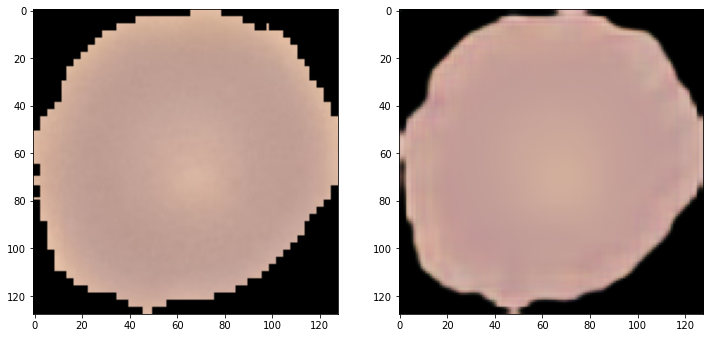

In [94]:
#Sanity check, view few images and corresponding reconstructions
image_number = random.randint(0, predicted.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(data_batch[0][image_number])
plt.subplot(122)
plt.imshow(predicted[image_number])
plt.show()

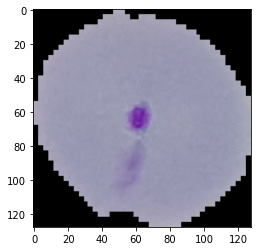

In [84]:
plt.imshow(anomaly_generator[0][0][0])